# Aligning mono using a Mo standard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mic_instrument.startup import *

I Tue-13:32:08.000: **************************************** Bluesky Startup Initialized



Below are the IPython logging settings for your session.
These settings have no impact on your experiment.

Activating auto-logging. Current session state plus future input saved.
Filename       : /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/notebooks/.logs/ipython_log.py
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Tue-13:32:08.331: APS DM environment file: /home/dm_id/etc/dm.setup.sh
I Tue-13:32:08.334: APS DM workflow owner: 19id


Exception reporting mode: Plain

End of IPython settings



I Tue-13:32:10.157: Databroker catalog: 19id_isn
I Tue-13:32:10.165: using ophyd control layer: 'pyepics'
I Tue-13:32:10.721: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/utils.py
I Tue-13:32:10.722: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/save_data.py
I Tue-13:32:10.724: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/utils/writeDetH5.py
I Tue-13:32:10.725: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/xspress3.py
I Tue-13:32:10.727: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/scan_record.py
I Tue-13:32:10.822: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/data_management.py
I Tue-13:32:11.264: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/ad_fileplugin.py
I Tue-13:32:11.271: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/eiger1m.py
I Tue-13:32:13.784: /home/beams43/STAFF19ID/bluesky_gyl/bl

We are going to use tetramm 4 for this measurement. We are using the test tetramm_4 for this measurement.

In [3]:
detectors = [tetramm_4.current_1, ring.current]

In [12]:
mono.bragg.settle_time = 1

First, we will scan the mono angle:

mono_bragg:   1%|               | 0.0043093/0.7734466 [00:00<00:38, 49.44s/deg]
mono_bragg:   2%|▎              | 0.0145011/0.7734466 [00:00<00:21, 28.73s/deg]
mono_bragg:   3%|▍              | 0.0246718/0.7734466 [00:00<00:18, 25.14s/deg]
mono_bragg:   5%|▋              | 0.0348502/0.7734466 [00:00<00:17, 23.65s/deg]
mono_bragg:   6%|▊              | 0.0450591/0.7734466 [00:01<00:16, 22.81s/deg]
mono_bragg:   7%|█              | 0.0552547/0.7734466 [00:01<00:16, 22.29s/deg]
mono_bragg:   8%|█▎             | 0.0654521/0.7734466 [00:01<00:15, 21.92s/deg]
mono_bragg:  10%|█▍             | 0.0755466/0.7734466 [00:01<00:15, 21.68s/deg]
mono_bragg:  11%|█▋             | 0.0858108/0.7734466 [00:01<00:14, 21.47s/deg]
mono_bragg:  12%|█▊             | 0.0959568/0.7734466 [00:02<00:14, 21.33s/deg]
mono_bragg:  14%|██             | 0.1061886/0.7734466 [00:02<00:14, 21.19s/deg]
mono_bragg:  15%|██▎            | 0.1163632/0.7734466 [00:02<00:13, 21.09s/deg]
mono_bragg:  16%|██▍            | 0.1266

('85603a2c-f9a3-412a-aa2f-6bb72438058a',)

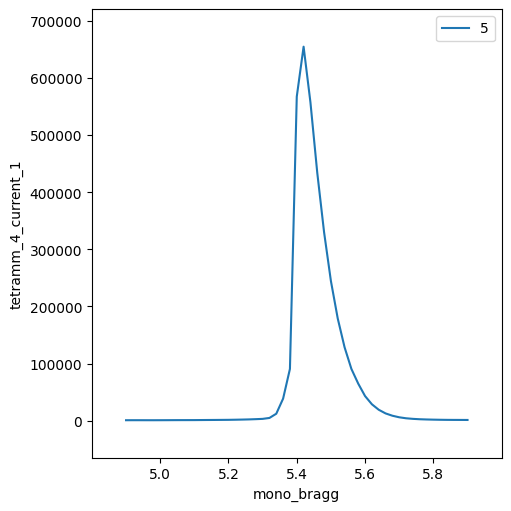

In [13]:
RE(bp.scan(detectors, mono.bragg, 4.9, 5.9, num=51))

In [23]:
data = cat[-1].primary.read().to_pandas()
data['energy'] = mono.theta_to_energy(data['mono_bragg'])
data['offset'] = 800000 - data['tetramm_4_current_1'] 

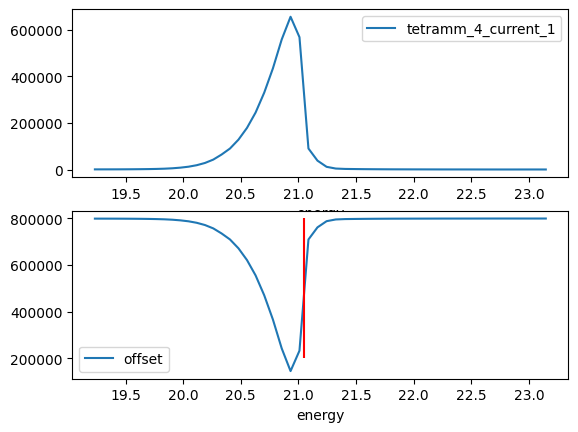

In [27]:
fig, axes = plt.subplots(2,1)

data.plot.line(x='energy', y='tetramm_4_current_1',ax=axes[0])
data.plot.line(x='energy', y='offset',ax=axes[1])

axes[1].vlines(21.05, ymin=200000, ymax=800000, color='red')

mono:   1%|▎                               | 0.015/1.756 [00:00<00:24, 14.26s/]
mono:   3%|▉                               | 0.049/1.756 [00:00<00:14,  8.53s/]
mono:   5%|█▍                              | 0.082/1.756 [00:00<00:12,  7.59s/]
mono:   7%|██                              | 0.116/1.756 [00:00<00:11,  7.12s/]
mono:   9%|██▊                              | 0.15/1.756 [00:01<00:11,  6.92s/]
mono:  11%|███▎                            | 0.185/1.756 [00:01<00:10,  6.71s/]
mono:  12%|███▉                            | 0.218/1.756 [00:01<00:10,  6.63s/]
mono:  14%|████▌                           | 0.252/1.756 [00:01<00:09,  6.54s/]
mono:  16%|█████▏                          | 0.286/1.756 [00:01<00:09,  6.48s/]
mono:  18%|██████                           | 0.32/1.756 [00:02<00:09,  6.43s/]
mono:  20%|██████▍                         | 0.355/1.756 [00:02<00:08,  6.37s/]
mono:  22%|███████                         | 0.389/1.756 [00:02<00:08,  6.34s/]
mono:  24%|███████▋                     

('7bad3abd-a186-4cdd-b636-76f553392ef4',)

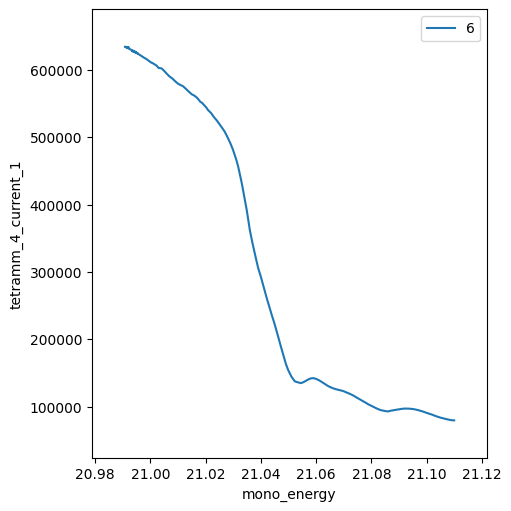

In [28]:
RE(bp.scan(detectors, mono.energy, 20.99, 21.11, num=121))

In [7]:
data = cat['7bad3abd-a186-4cdd-b636-76f553392ef4'].primary.read().to_pandas()
data['offset'] = 800000 - data['tetramm_4_current_1'] 

data.to_csv('Data/Data/Mono/Mo_20p0_keV_calibration.csv')

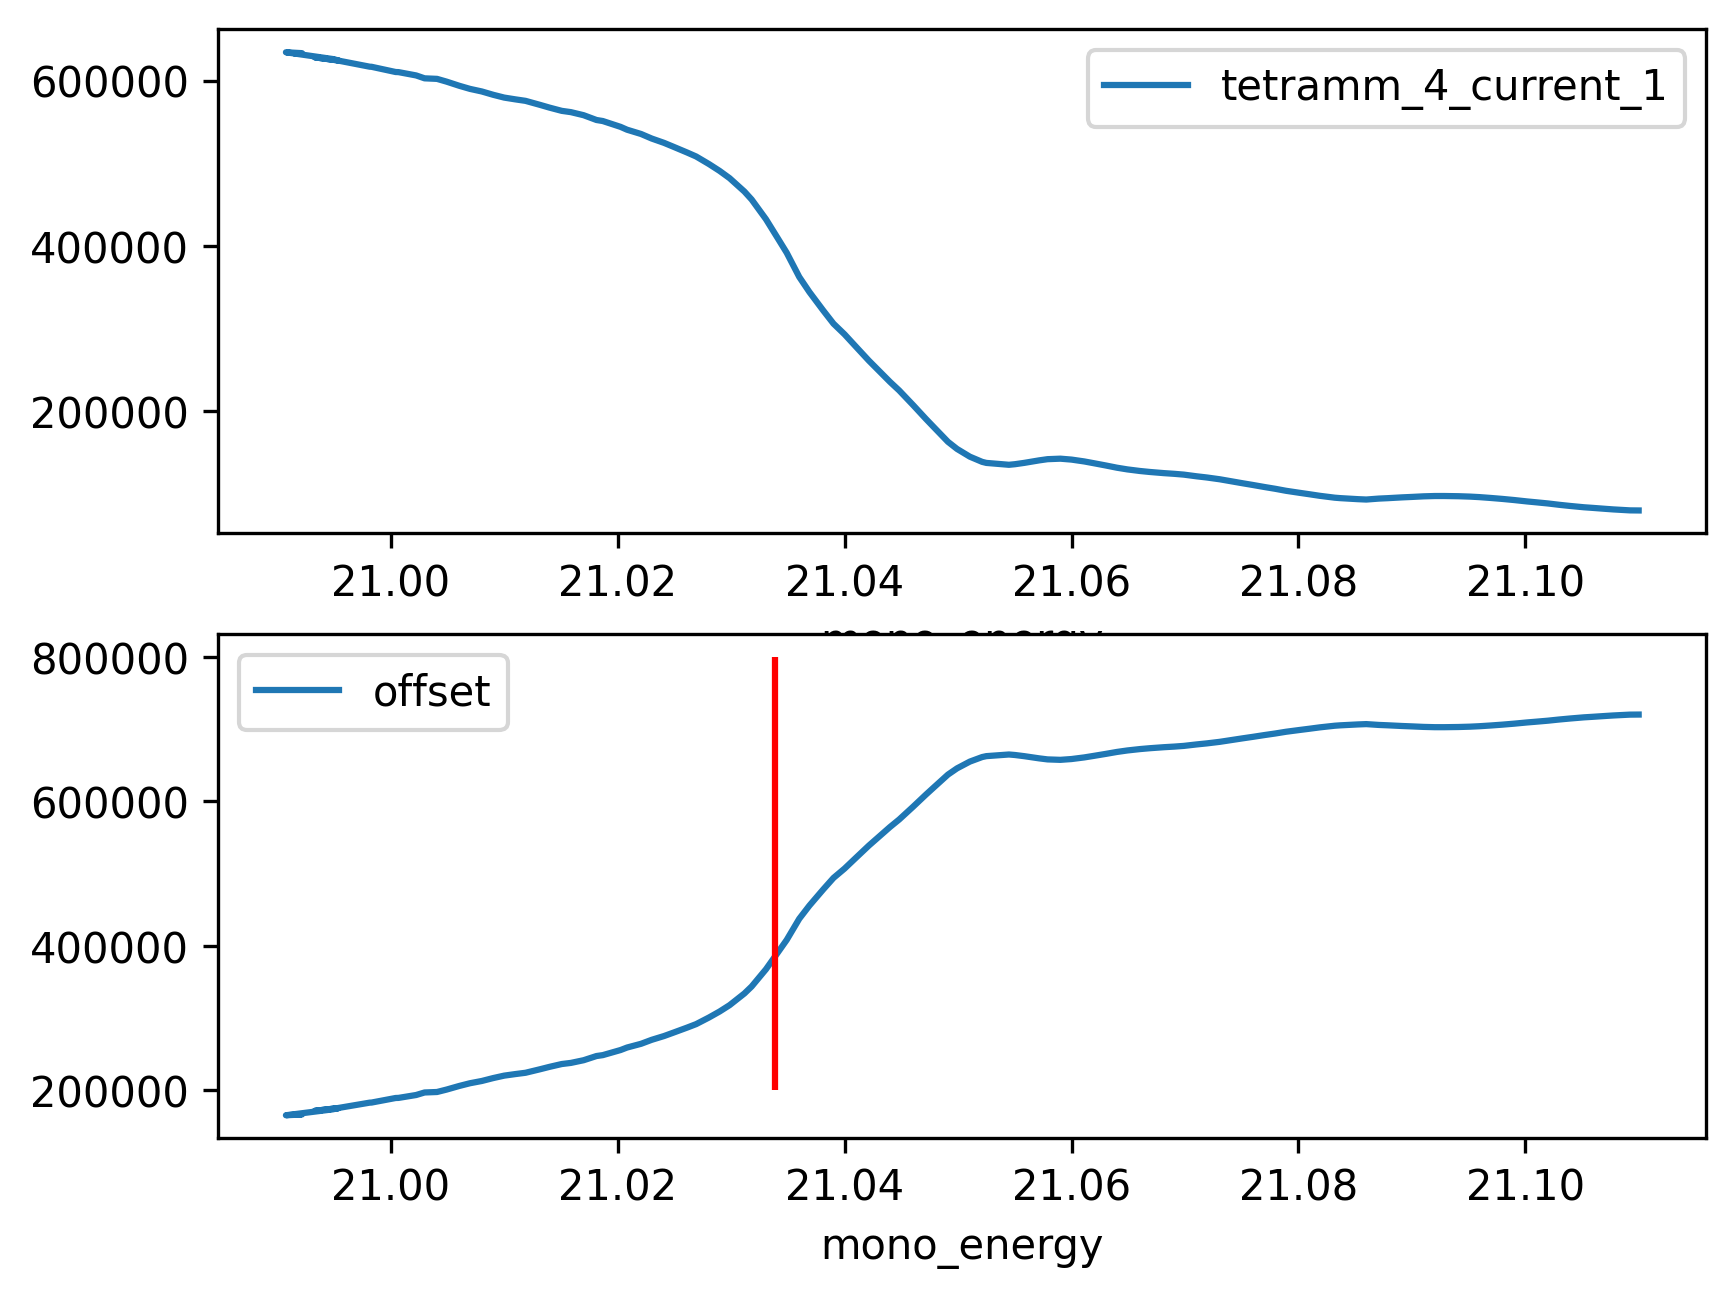

In [5]:
fig, axes = plt.subplots(2,1, dpi=300)

data.plot.line(x='mono_energy', y='tetramm_4_current_1',ax=axes[0])
data.plot.line(x='mono_energy', y='offset',ax=axes[1])

axes[1].vlines(21.03387, ymin=200000, ymax=800000, color='red')

After determining the edge visually, we move to this position.

In [40]:
RE(bps.mv(mono.energy, 21.03387))

mono:  23%|███████▍                        | 0.018/0.077 [00:00<00:00, 11.91s/]
mono:  75%|████████████████████████        | 0.058/0.077 [00:00<00:00,  7.21s/]
mono: 100%|████████████████████████████████| 0.077/0.077 [00:00<00:00,  8.09s/]
mono: 100%|████████████████████████████████| 0.077/0.077 [00:00<00:00, 10.73s/]
mono: 100%|████████████████████████████████| 0.077/0.077 [00:01<00:00, 23.76s/]
                                                                               


()

Based on the calibration, this should be 20 keV, so we redefine the th angle to match this by using the set_energy function.

In [42]:
mono.set_energy(20)

## 20 keV beam optimization

We removed the Mo target. Now we will optimize the rest of the parameters.


hhl_mirrors_jack [In progress. No progress bar available.]                     
hhl_mirrors_jack:   0%|             | 0.0001/0.0210026 [00:00<00:01, 91.72s/mm]
hhl_mirrors_jack [In progress. No progress bar available.]                     
hhl_mirrors_jack:   0%|             | 0.0001/0.0212053 [00:00<00:02, 97.01s/mm]
hhl_mirrors_jack [In progress. No progress bar available.]                     
hhl_mirrors_jack:   0%|             | 0.0001/0.0210079 [00:00<00:02, 98.10s/mm]
hhl_mirrors_jack [In progress. No progress bar available.]                     
hhl_mirrors_jack:   0%|            | 0.0001/0.0210605 [00:00<00:02, 108.91s/mm]
hhl_mirrors_jack [In progress. No progress bar available.]                     
hhl_mirrors_jack:   0%|             | 0.0001/0.0210132 [00:00<00:02, 97.07s/mm]
hhl_mirrors_jack [In progress. No progress bar available.]                     
hhl_mirrors_jack:   0%|             | 0.0001/0.0210658 [00:00<00:01, 94.63s/mm]
hhl_mirrors_jack [In progress. No progr

hhl_mirrors_jack:   1%|▏             | 0.00235/0.24985 [00:00<00:22, 90.99s/mm]
hhl_mirrors_jack:   6%|▉               | 0.015/0.24985 [00:00<00:06, 27.91s/mm]
hhl_mirrors_jack:  13%|█▊            | 0.03195/0.24985 [00:00<00:04, 19.48s/mm]
hhl_mirrors_jack:  20%|██▊           | 0.04925/0.24985 [00:00<00:03, 16.79s/mm]
hhl_mirrors_jack:  27%|████           | 0.0668/0.24985 [00:01<00:02, 15.44s/mm]
hhl_mirrors_jack:  34%|█████          | 0.0843/0.24985 [00:01<00:02, 14.67s/mm]
hhl_mirrors_jack:  41%|█████▋        | 0.10195/0.24985 [00:01<00:02, 14.14s/mm]
hhl_mirrors_jack:  48%|██████▋       | 0.11955/0.24985 [00:01<00:01, 13.77s/mm]
hhl_mirrors_jack:  55%|███████▋      | 0.13715/0.24985 [00:01<00:01, 13.49s/mm]
hhl_mirrors_jack:  62%|█████████▎     | 0.1547/0.24985 [00:02<00:01, 13.28s/mm]
hhl_mirrors_jack:  69%|█████████▋    | 0.17225/0.24985 [00:02<00:01, 13.12s/mm]
hhl_mirrors_jack:  76%|██████████▋   | 0.18975/0.24985 [00:02<00:00, 12.98s/mm]
hhl_mirrors_jack:  83%|████████████▍  | 

('4997a971-a669-4a1d-ab12-3139224472b9',)

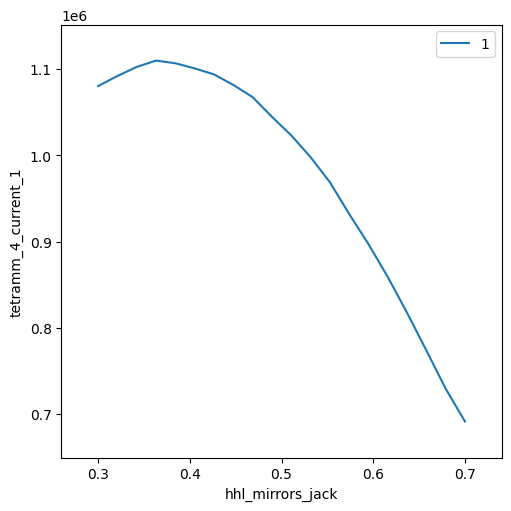

In [8]:
hhl_mirrors.jack.settle_time = 0.5

RE(bp.scan(detectors, hhl_mirrors.jack, 0.3, 0.7, num=20))

In [13]:
bec.peaks

{
'com':
    {'tetramm_4_current_1': 0.48452977669551917}
,
'cen':
    {'tetramm_4_current_1': 0.5926495658963941}
,
'max':
    {'tetramm_4_current_1': (0.3631500000001324,
                             1109813.2576291799)}
,
'min':
    {'tetramm_4_current_1': (0.7000000000000455,
                             691683.3647086765)}
,
'fwhm':
    {'tetramm_4_current_1': None}
,
}

In [14]:
RE(bps.mv(hhl_mirrors.jack, 0.36315))

hhl_mirrors_jack:   1%|                | 0.002/0.3369 [00:00<00:35, 107.18s/mm]
hhl_mirrors_jack:   4%|▋               | 0.0149/0.3369 [00:00<00:09, 28.13s/mm]
hhl_mirrors_jack:   9%|█▌               | 0.032/0.3369 [00:00<00:05, 19.50s/mm]
hhl_mirrors_jack:  15%|██▏            | 0.04945/0.3369 [00:00<00:04, 16.75s/mm]
hhl_mirrors_jack:  20%|███▍             | 0.067/0.3369 [00:01<00:04, 15.41s/mm]
hhl_mirrors_jack:  25%|███▊           | 0.08455/0.3369 [00:01<00:03, 14.64s/mm]
hhl_mirrors_jack:  30%|████▊           | 0.1021/0.3369 [00:01<00:03, 14.12s/mm]
hhl_mirrors_jack:  36%|█████▎         | 0.11965/0.3369 [00:01<00:02, 13.76s/mm]
hhl_mirrors_jack:  41%|██████▌         | 0.1372/0.3369 [00:01<00:02, 13.49s/mm]
hhl_mirrors_jack:  46%|██████▉        | 0.15465/0.3369 [00:02<00:02, 13.29s/mm]
hhl_mirrors_jack:  51%|████████▏       | 0.1721/0.3369 [00:02<00:02, 13.13s/mm]
hhl_mirrors_jack:  56%|████████▍      | 0.18965/0.3369 [00:02<00:01, 12.99s/mm]
hhl_mirrors_jack:  61%|█████████▊      |

()

hhl_mirrors_pitch:  15%|█      | 0.0146353/0.1000456 [00:00<00:01, 14.67s/mrad]
hhl_mirrors_pitch:  55%|███▊   | 0.0552783/0.1000456 [00:00<00:00,  7.58s/mrad]
hhl_mirrors_pitch:  93%|██████▍| 0.0927542/0.1000456 [00:00<00:00,  6.72s/mrad]
hhl_mirrors_pitch: 100%|███████| 0.1000456/0.1000456 [00:00<00:00,  8.28s/mrad]
hhl_mirrors_pitch: 100%|███████| 0.1000456/0.1000456 [00:01<00:00, 10.32s/mrad]
hhl_mirrors_pitch: 100%|███████| 0.1000456/0.1000456 [00:01<00:00, 10.40s/mrad]
hhl_mirrors_pitch: 100%|██████▉| 0.0999999/0.1000456 [00:01<00:00, 12.46s/mrad]
                                                                               
hhl_mirrors_pitch:  87%|██████ | 0.0091651/0.0104806 [00:00<00:00, 23.39s/mrad]
hhl_mirrors_pitch: 100%|██████▉| 0.0104606/0.0104806 [00:00<00:00, 40.05s/mrad]
                                                                               
hhl_mirrors_pitch:  88%|███████ | 0.009309/0.0105463 [00:00<00:00, 22.98s/mrad]
hhl_mirrors_pitch: 100%|███████| 0.01054

('1e8567cb-1bd4-46ee-a3f0-32817a9e9852',)

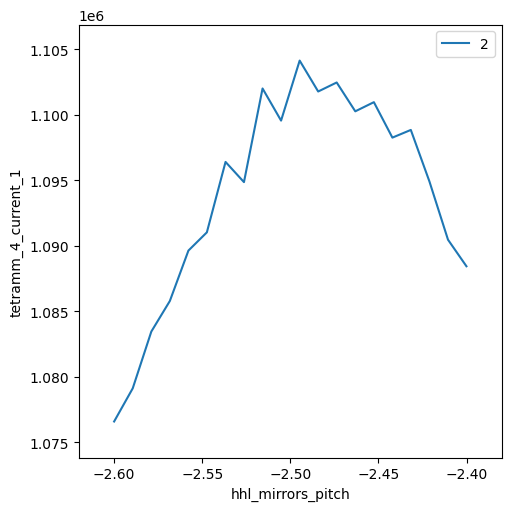

In [15]:
hhl_mirrors.pitch.settle_time =0.5

RE(bp.scan(detectors, hhl_mirrors.pitch, -2.4, -2.6, num=20))

In [16]:
bec.peaks

{
'com':
    {'tetramm_4_current_1': -2.499753304891581}
,
'cen':
    {'tetramm_4_current_1': -2.4811895988979984}
,
'max':
    {'tetramm_4_current_1': (-2.494719353999926,
                             1104145.0352094676)}
,
'min':
    {'tetramm_4_current_1': (-2.600045550999994,
                             1076597.493149155)}
,
'fwhm':
    {'tetramm_4_current_1': 0.14240894166211993}
,
}

mono_pitch:  20%|██▌          | 0.00199677/0.00999992 [00:00<00:00, 107.11s/mm]
mono_pitch:  61%|████████▌     | 0.00607661/0.00999992 [00:00<00:00, 68.65s/mm]
mono_pitch:  96%|█████████████▍| 0.00957489/0.00999992 [00:00<00:00, 65.15s/mm]
mono_pitch: 100%|██████████████| 0.00999992/0.00999992 [00:00<00:00, 82.78s/mm]
                                                                               
mono_pitch: 100%|███████████▉| 0.00020408/0.00020416 [00:00<00:00, 1040.67s/mm]
                                                                               
mono_pitch: 100%|███████████▉| 0.00020398/0.00020416 [00:00<00:00, 1051.17s/mm]
                                                                               
mono_pitch: 100%|███████████▉| 0.00020398/0.00020426 [00:00<00:00, 1044.54s/mm]
                                                                               
mono_pitch: 100%|███████████▉| 0.00020398/0.00020436 [00:00<00:00, 1045.35s/mm]
                                        

('44ef356a-acea-4e91-b0e6-4086e0fafa50',)

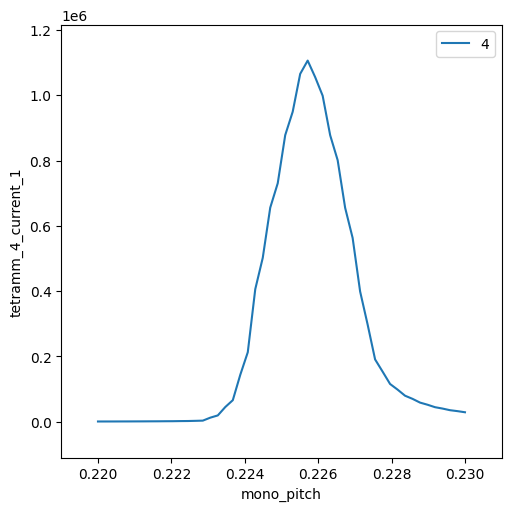

In [18]:
mono.pitch.settle_time = 1

RE(bp.scan(detectors, mono.pitch, 0.22,0.23, num=50))

In [19]:
bec.peaks

{
'com':
    {'tetramm_4_current_1': 0.2258795481009523}
,
'cen':
    {'tetramm_4_current_1': 0.22575450597461322}
,
'max':
    {'tetramm_4_current_1': (0.22571390818200002,
                             1106170.2087179723)}
,
'min':
    {'tetramm_4_current_1': (0.2199999234048,
                             818.2049073858219)}
,
'fwhm':
    {'tetramm_4_current_1': 0.0023926501223230923}
,
}